
# Joss White
## MILESTONE 2


-Mainly interested In analyzing the most ideal time frame between project launch and deadline.
-Also curious to see whether or not the length of the project name has any impact on its success.


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("C:\\Users\\jossw\\OneDrive\\Desktop\\UBCOYR3\\COSC301\\project-group-26\\data\\raw\\ks-projects-201801.csv")
df


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# MILESTONE 3
## TASK 1: EDA

First step is to get a good look at data, including rows, colums (shape) and the head to get a general idea

In [ ]:
df.shape

(378661, 15)

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

Looking at the number of unique attributes in columns, I can start to see where I want to trim down my data. I am only concerned with state being either "Failed" or "Success", so in task 2 I will be sure to remove every state aside from those. I can see that there are 15 main cattegories, with 159 subcategories. I will look to also remove the subcategories, as they don't do much for my area of interest and generally clutter the data. The currency is also something that I figure is irrelevant to my questions.

Text(0.5, 1.0, 'Correlation')

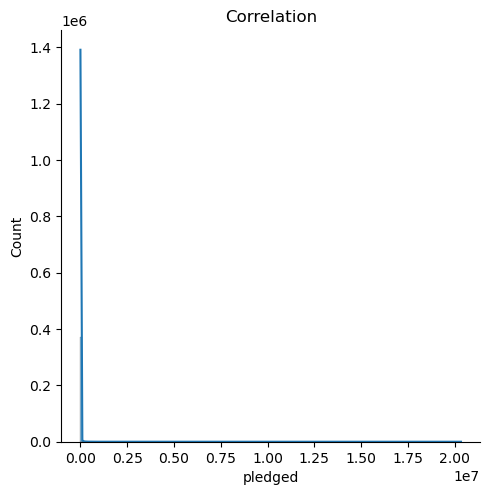

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
dl = df.copy()

#make a few graphs, this one is not a good example yet.
sb.displot(dl['pledged'], kde = True, bins=250)
plt.title("Correlation")


# Task 2: Data Analysis Pipeline

Step 1: Load data, already done.

Step 2: Clean data

-Initially, I want to remove anything that isnt either "Failed" or "Success" in the state column. This way I am only analyzing projects that have ran the course of their duration and either succeeded or failed.
-I will also clean up the categories by removing the 159 subcategories as I find they just clutter things and don't pertain to my area of ineterest. 
-Currency is also irrelevant as everything is compared in USD, so that will be removed.
-Country also does not pertain to my area of interest so for organization sake I will remove it.
-Pledged is irrelevent as I will be using USD_pledged to compare. Will drop it.
-I also have confusion over the 'goal' and 'usd pledged' vs usd_goal_real and usd_pledged_real, so will remove goal and pledged for simplicity and just use usd_real ones, which I know is the initial asked and pledged amount in USD.


In [ ]:
dc = df.copy()
dc = dc.loc[dc['state'].isin(['successful','failed'])]
dc = dc.drop(['category','currency','country', 'pledged', 'goal', 'usd pledged'], axis=1)
dc.nunique()

,ID,name,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,1000004038,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00


I will now rename some columns so they are more readable.

In [ ]:
dc = dc.rename(columns={'main_category': 'category', 'usd_pledged_real': 'pledged', 'usd_goal_real': 'goal'})
dc.head()

,ID,name,category,deadline,launched,state,backers,pledged,goal
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,1000004038,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00


Now the data is much cleaner and pertains specifically to my analysis interests 